<a href="https://colab.research.google.com/github/dilaraogz/GMKA_DILARA_OGUZ/blob/main/python_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import seaborn as sns



In [133]:
# Verileri indir


df=pd.read_excel('temelozett.xlsx')
df



,Kod,Hisse Adı,Sektör,Kapanış(TL),Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL)
0,ACSEL,Acıselsan Acıpayam Selüloz,Kimyasal Ürün,50.50,541.4,27.8,51.8,10.7
1,ADEL,Adel Kalemcilik,Kırtasiye,104.90,2478.3,127.0,27.7,23.6
2,ADESE,Adese AVM,Perakande - Ticaret,1.23,1239.8,63.5,92.9,1008.0
3,AEFES,Anadolu Efes,Meşrubat / İçecek,62.80,37184.2,1905.9,32.9,592.1
4,AFYON,Afyon Çimento,Çimento,7.12,2848.0,146.0,48.6,400.0
...,...,...,...,...,...,...,...,...
494,YYAPI,Yesil Yapi,İnşaat- Taahhüt,2.18,701.3,35.9,72.3,321.7
495,YYLGD,Yayla Agro Gıda,Gıda,24.80,11720.5,600.7,15.0,472.6
496,ZEDUR,Zedur Enerji,Elektrik,32.68,817.0,41.9,38.6,25.0
497,ZOREN,Zorlu Enerji,Elektrik,4.06,10150.0,520.3,29.1,2500.0


In [134]:
df.head()


,Kod,Hisse Adı,Sektör,Kapanış(TL),Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL)
0,ACSEL,Acıselsan Acıpayam Selüloz,Kimyasal Ürün,50.50,541.4,27.8,51.8,10.7
1,ADEL,Adel Kalemcilik,Kırtasiye,104.90,2478.3,127.0,27.7,23.6
2,ADESE,Adese AVM,Perakande - Ticaret,1.23,1239.8,63.5,92.9,1008.0
3,AEFES,Anadolu Efes,Meşrubat / İçecek,62.80,37184.2,1905.9,32.9,592.1
4,AFYON,Afyon Çimento,Çimento,7.12,2848.0,146.0,48.6,400.0


In [135]:
# Piyasa Değeri sütununu ekleyelim
#df['Piyasa_Degeri'] = df['Fiyat'] * df['Hisse Adı']


In [136]:
# Piyasa değeri en yüksek ilk 10 şirket
top10 = df.sort_values('Piyasa Değeri(mn TL)', ascending=False).head(10)
top10


,Kod,Hisse Adı,Sektör,Kapanış(TL),Piyasa Değeri(mn TL),Piyasa Değeri(mn $),Halka AçıklıkOranı (%),Sermaye(mn TL)
401,SASA,Sasa Polyester Sanayi A.Ş.,Endüstriyel Tekstil,95.15,219091.6,11229.8,23.0,2302.6
256,KCHOL,Koç Holding,Holdingler,75.70,191967.5,9839.5,26.4,2535.9
177,FROTO,Ford Otosan,Otomotiv,516.60,181280.1,9291.7,17.8,350.9
439,THYAO,Türk Hava Yolları,Havayolları ve Hizm.,125.50,173190.0,8877.1,50.3,1380.0
153,ENKAI,Enka İnşaat,İnşaat- Taahhüt,24.92,149520.0,7663.8,8.9,6000.0
381,QNBFB,QNB Finansbank,Bankacılık,38.40,128640.0,6593.6,0.1,3350.0
457,TUPRS,Tüpraş,Petrol,64.90,125049.0,6409.5,46.5,1926.8
412,SISE,Şişecam,Cam,36.84,112848.8,5784.2,48.9,3063.2
178,GARAN,Garanti Bankası,Bankacılık,25.50,107100.0,5489.5,14.0,4200.0
234,ISCTR,İş Bankası (C),Bankacılık,10.65,106499.7,5458.8,33.5,10000.0


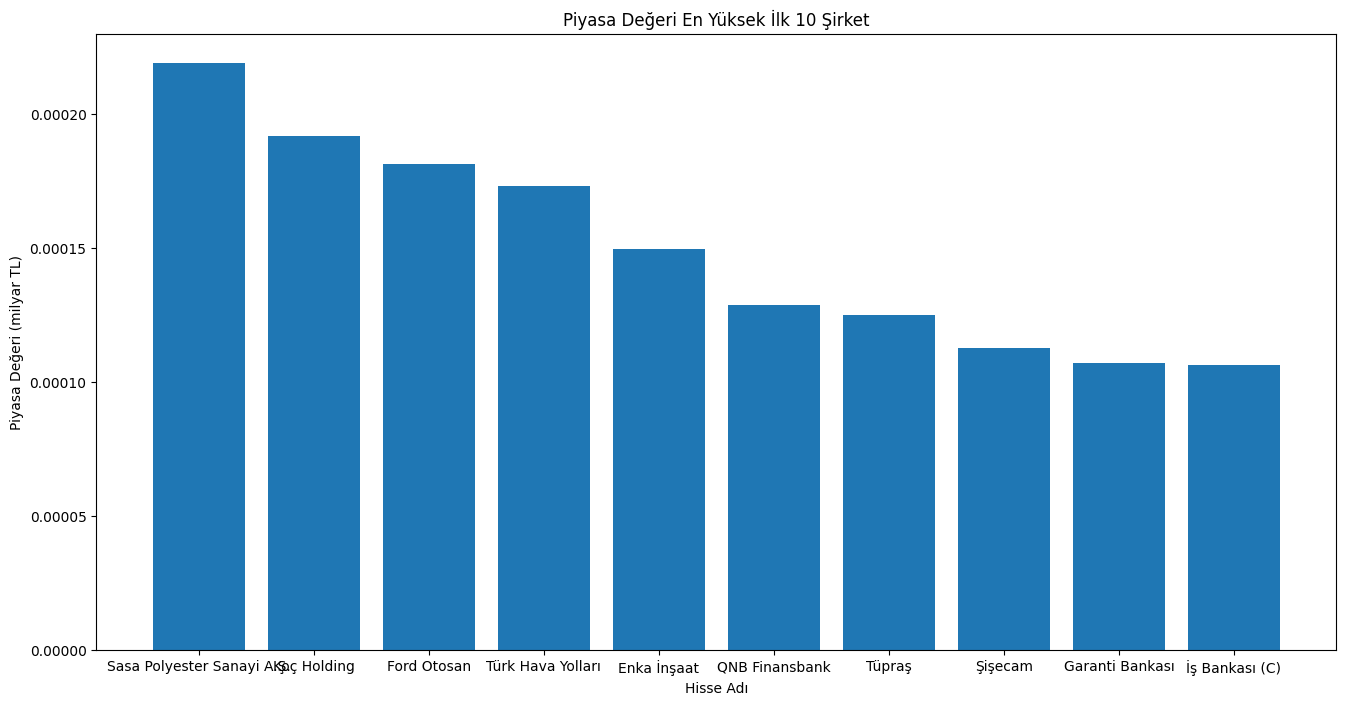

In [137]:
plt.figure(figsize=(16,8))
plt.bar(top10['Hisse Adı'], top10['Piyasa Değeri(mn TL)'] / 1e9)
plt.title('Piyasa Değeri En Yüksek İlk 10 Şirket')
plt.ylabel('Piyasa Değeri (milyar TL)')
plt.xlabel('Hisse Adı')
plt.show()


In [138]:
# Semboller listesi
symbols = ['SKBNK.IS', 'TCELL.IS', 'TSKB.IS', 'TTKOM.IS', 'TURSG.IS']

# Verileri al
data = yf.download(symbols, start='2016-01-01', end='2022-05-10', interval='1d', group_by='ticker')


[*********************100%***********************]  5 of 5 completed


In [139]:
# Her hisse senedi için ayrı bir veri çerçevesi oluştur
skbnk = data['SKBNK.IS']
tcell = data['TCELL.IS']
tskb = data['TSKB.IS']
ttkom = data['TTKOM.IS']
tursg = data['TURSG.IS']


In [140]:
# BIST100 Endeksi verilerini al
bist = yf.download('^XU100', start='2016-01-01', end='2022-05-10', interval='1d')


[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

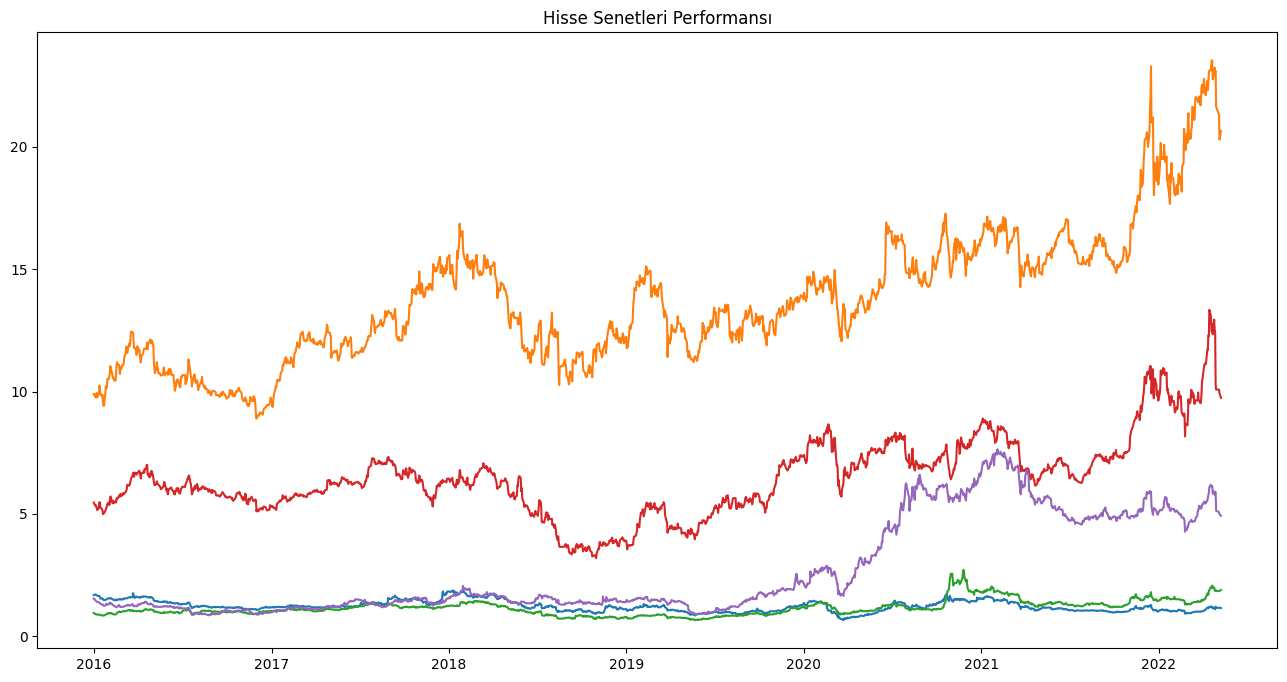

In [141]:
# Grafiği oluştur
plt.figure(figsize=(16,8))
plt.plot(skbnk['Close'], label='SKBNK')
plt.plot(tcell['Close'], label='TCELL')
plt.plot(tskb['Close'], label='TSKB')
plt.plot(ttkom['Close'], label='TTKOM')
plt.plot(tursg['Close'], label='TURSG')
#plt.plot(bist['Close'], label='BIST100')
plt.title('Hisse Senetleri Performansı')
plt.xlabel


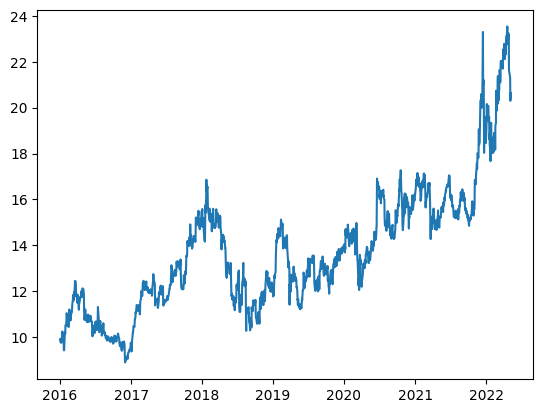

In [142]:
plt.plot(tcell['Close'], label='TCELL')

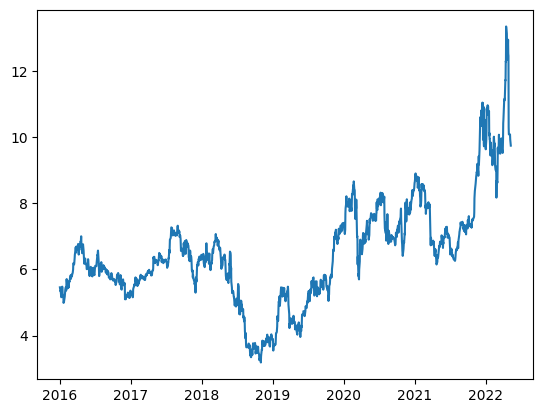

In [143]:
plt.plot(ttkom['Close'], label='TTKOM')

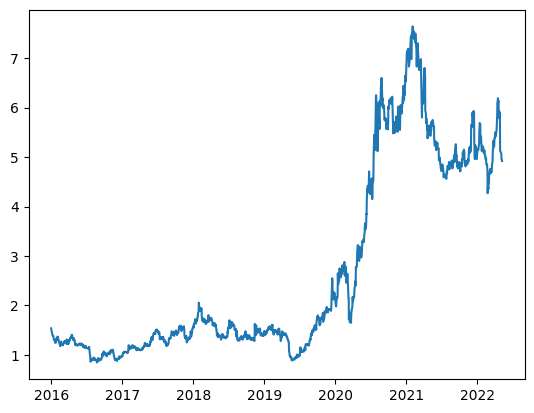

In [144]:
plt.plot(tursg['Close'], label='TURSG')

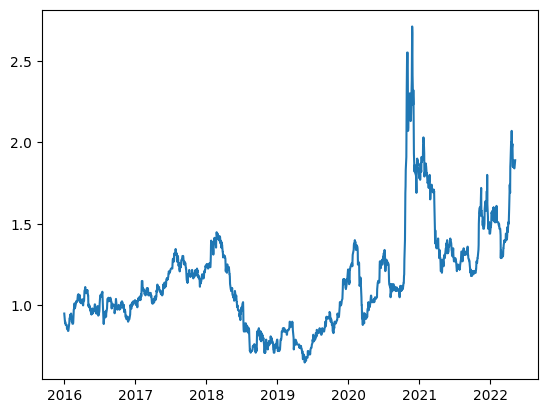

In [145]:
plt.plot(tskb['Close'], label='TSKB')

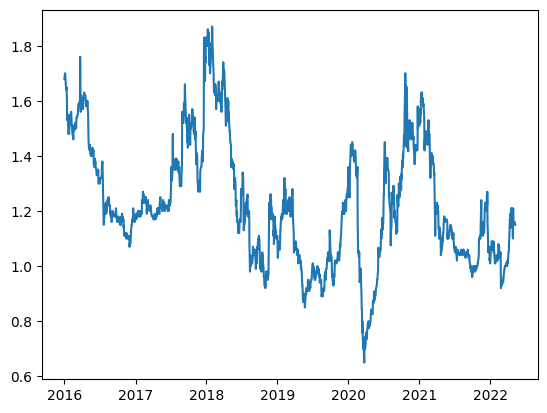

In [146]:
plt.plot(skbnk['Close'], label='SKBNK')

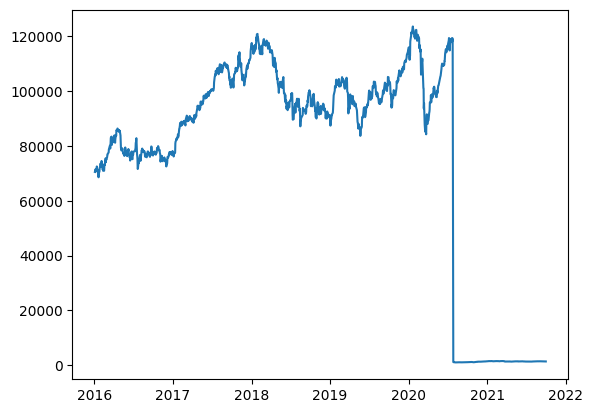

In [147]:
plt.plot(bist['Close'], label='BIST100')


In [158]:

#symbols = ['SKBNK.IS', 'TCELL.IS', 'TSKB.IS', 'TTKOM.IS', 'TURSG.IS']

# Hisse fiyatları
prices = {symbol: yf.Ticker(symbol).info['regularMarketPreviousClose'] for symbol in symbols}
print(prices)



{'SKBNK.IS': 2.26, 'TCELL.IS': 32.38, 'TSKB.IS': 4.21, 'TTKOM.IS': 14.27, 'TURSG.IS': 9.54}


In [153]:
# BIST5 endeksi hesaplama
bist5 = sum(prices.values()) / len(prices)
print("BIST5 endeksi: ", bist5)


BIST5 endeksi:  12.688


In [157]:
# BIST100 endeksi
bist100 = df['Kapanış(TL)'].mean()

print("BIST5 endeksi: ", bist5)
print("BIST100 endeksi: ", bist100)

if bist5 > bist100:
    print("BIST5 endeksi BIST100 endeksinden daha yüksektir.")
else:
    print("BIST100 endeksi BIST5 endeksinden daha yüksektir.")

BIST5 endeksi:  12.688
BIST100 endeksi:  2317.1575150300605
BIST100 endeksi BIST5 endeksinden daha yüksektir.
